# Preparación del conjunto de datos

En este notebook se muestran algunas de las técnicas más utilizadas para transformar el conjunto de datos

## Conjunto de datos_Flujo de tráfico de red(anomalo o normal)

### Descripción
NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

### Ficheros de datos
* <span style="color:green">**KDDTrain+.ARFF**: The full NSL-KDD train set with binary labels in ARFF format</span>
* KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
* KDDTrain+_20Percent.ARFF:	A 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT:	A 20% subset of the KDDTrain+.txt file
* KDDTest+.ARFF:	The full NSL-KDD test set with binary labels in ARFF format
* KDDTest+.TXT:	The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
* KDDTest-21.ARFF:	A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
* KDDTest-21.TXT:	A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

### Descarga de los ficheros de datos
https://iscxdownloads.cs.unb.ca/iscxdownloads/NSL-KDD/#NSL-KDD

### Referencias adicionales sobre el conjunto de datos
_M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009._

### PREPROCESAMIENTO DE DATOS-PROCESOS
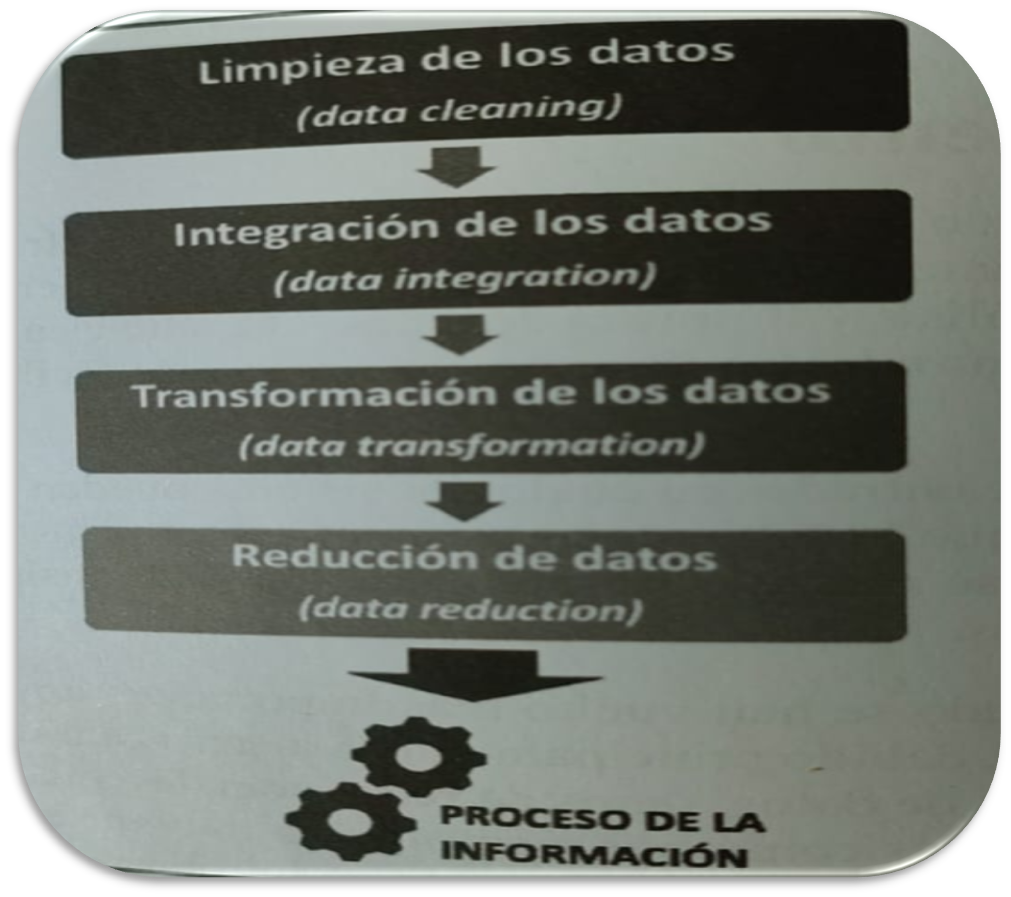

## Imports

In [1]:
!pip install arff

In [1]:
 #Tratamiento de datos
# =====================
#import arff
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ===============================================================
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Funciones auxiliares

In [2]:
def load_kdd_dataset(data_path):
    """Lectura del conjunto de datos NSL-KDD."""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
    attributes = [attr[0] for attr in dataset["attributes"]]
    return pd.DataFrame(dataset["data"], columns=attributes)

In [3]:
#Funciones para división del cinjunto de datos en tres partes
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

## 1. Lectura del conjunto de datos

In [4]:
#se utilizara un unico subconjutno de Train(subrayado en verde)
data=pd.read_csv('KDDTrain+.txt')
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

data.columns = columns
data = data.drop('level', axis=1)
data.tail(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
125962,0,tcp,http,SF,334,1600,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal
125963,0,tcp,private,S0,0,0,0,0,0,0,...,12,0.05,0.06,0.00,0.00,1.00,1.0,0.00,0.0,neptune
125964,0,tcp,smtp,SF,2233,365,0,0,0,0,...,2,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,normal
125965,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.0,0.00,0.0,neptune
125966,0,tcp,http,SF,359,375,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.0,0.00,0.0,normal
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.0,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.0,neptune
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.00,0.00,0.0,0.00,0.0,normal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [6]:
data_test=pd.read_csv('KDDTest+.txt')
data_test.columns = columns
data_test = data_test.drop('level', axis=1)
data_test.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal
22542,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan


### 1.1 EDA

In [7]:
data.shape

(125972, 42)

In [8]:
data['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [9]:
data['service'].unique()

array(['other', 'private', 'http', 'remote_job', 'ftp_data', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [10]:
data['protocol_type'].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [11]:
print(data.isnull().values.any())

False


In [12]:
data['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [13]:
data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [13]:
## Faltaria otras tecnicas para EDA......

## 2. División del conjunto de datos

In [14]:
#se divide en tres subconjuntos y con stratify se manteine la propoción de columna protoclo en la proporición de los tres subconjuntos
train_set, val_set, test_set = train_val_test_split(data, stratify='protocol_type')

In [15]:
print('longitud del training set', len(train_set))
print('longitud del Vañidation set', len(val_set))
print('longitud del Test set', len(test_set))

longitud del training set 75583
longitud del Vañidation set 25194
longitud del Test set 25195


## 3 Limpiando los datos

Antes de comenzar, vamos a recuperar el conjunto de datos limpio y vamos a separar las etiquetas del resto de los datos, no necesariamente queremos aplicar las mismas transformaciones en ambos conjuntos.

In [16]:
# Separamos las características de entrada de la característica de salida
# Quedamos en la Clase 11 Sept
X_train = train_set.drop("attack", axis=1)
y_train = train_set["attack"].copy()

In [19]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
46670,2,tcp,ftp_data,SF,2194619.0,0.0,0,0,0,0,...,50,6,0.12,0.08,0.12,0.00,0.0,0.0,0.0,0.0
120455,0,tcp,ftp_data,SF,15876.0,0.0,0,0,0,0,...,255,25,0.10,0.45,0.10,0.00,0.0,0.0,0.0,0.0
80862,0,tcp,auth,S0,0.0,0.0,0,0,0,0,...,255,1,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0
118642,2,tcp,private,RSTR,0.0,0.0,0,0,0,0,...,255,2,0.01,0.51,1.00,0.00,0.0,0.0,1.0,1.0
106318,0,icmp,eco_i,SF,8.0,0.0,0,0,0,0,...,2,7,1.00,0.00,1.00,0.57,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86892,0,tcp,http,SF,210.0,61957.0,0,0,0,0,...,219,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0
109143,0,tcp,http,SF,314.0,NaN,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
38107,0,tcp,ftp_data,S0,0.0,0.0,0,0,0,0,...,255,49,0.19,0.04,0.01,0.00,1.0,1.0,0.0,0.0
78144,0,tcp,smtp,SF,1284.0,329.0,0,0,0,0,...,207,149,0.61,0.02,0.00,0.01,0.0,0.0,0.0,0.0


In [20]:
# A nivel de ejercicio vamos a añadir algunos valores nulos 
# a algunas características del conjunto de datos, suponemos una falla del analizador
X_train.loc[(X_train["src_bytes"]>400) & (X_train["src_bytes"]<800), "src_bytes"] = np.nan
X_train.loc[(X_train["dst_bytes"]>500) & (X_train["dst_bytes"]<2000), "dst_bytes"] = np.nan
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
46670,2,tcp,ftp_data,SF,2194619.0,0.0,0,0,0,0,...,50,6,0.12,0.08,0.12,0.00,0.0,0.0,0.0,0.0
120455,0,tcp,ftp_data,SF,15876.0,0.0,0,0,0,0,...,255,25,0.10,0.45,0.10,0.00,0.0,0.0,0.0,0.0
80862,0,tcp,auth,S0,0.0,0.0,0,0,0,0,...,255,1,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0
118642,2,tcp,private,RSTR,0.0,0.0,0,0,0,0,...,255,2,0.01,0.51,1.00,0.00,0.0,0.0,1.0,1.0
106318,0,icmp,eco_i,SF,8.0,0.0,0,0,0,0,...,2,7,1.00,0.00,1.00,0.57,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86892,0,tcp,http,SF,210.0,61957.0,0,0,0,0,...,219,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0
109143,0,tcp,http,SF,314.0,NaN,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
38107,0,tcp,ftp_data,S0,0.0,0.0,0,0,0,0,...,255,49,0.19,0.04,0.01,0.00,1.0,1.0,0.0,0.0
78144,0,tcp,smtp,SF,1284.0,329.0,0,0,0,0,...,207,149,0.61,0.02,0.00,0.01,0.0,0.0,0.0,0.0


In [22]:
#Mezclar el dataset
X_train = X_train.sample(frac=1).reset_index(drop=True)
X_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,nnsp,S0,0.0,0.0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.0,1.00,1.0,0.00,0.0
1,0,tcp,imap4,S0,0.0,0.0,0,0,0,0,...,255,14,0.05,0.05,0.00,0.0,1.00,1.0,0.00,0.0
2,0,tcp,exec,S0,0.0,0.0,0,0,0,0,...,255,5,0.02,0.06,0.00,0.0,1.00,1.0,0.00,0.0
3,0,tcp,vmnet,S0,0.0,0.0,0,0,0,0,...,255,25,0.10,0.04,0.00,0.0,1.00,1.0,0.00,0.0
4,0,udp,private,SF,1.0,0.0,0,0,0,0,...,255,2,0.01,0.46,0.65,0.0,0.03,0.0,0.32,0.0
5,0,tcp,login,S0,0.0,0.0,0,0,0,0,...,255,3,0.01,0.06,0.00,0.0,1.00,1.0,0.00,0.0
6,0,tcp,http,SF,353.0,NaN,0,0,0,0,...,255,255,1.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0
7,0,tcp,ftp_data,S0,0.0,0.0,0,0,0,0,...,255,48,0.19,0.05,0.01,0.0,1.00,1.0,0.00,0.0
8,0,tcp,private,S0,0.0,0.0,0,0,0,0,...,255,2,0.01,0.06,0.00,0.0,1.00,1.0,0.00,0.0
9,0,tcp,ftp_data,SF,1470.0,0.0,0,0,0,0,...,255,111,0.44,0.03,0.44,0.0,0.00,0.0,0.00,0.0


La mayoria de los algoritmos de Machine Learning no pueden trabajar sobre caracteristicas que **contengan valores nulos.** Por ello, existen tres opciones para reemplazarlos:
* Eliminar las filas correspondientes
* Eliminar el atributo (columna) correspondiente
* Rellenarlos con un valor determinado (zero, media ...)

In [29]:
# Comprobamos si existe algún atributo con valores nulos
X_train.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                       True
dst_bytes                       True
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [24]:
# Seleccionamos las filas que contienen algun valores nulos en algunos 
#de sus caracteriticas con la seentencia 
filas_valores_nulos  = X_train[X_train.isnull().any(axis=1)]
filas_valores_nulos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
6,0,tcp,http,SF,353.0,NaN,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
19,0,tcp,ftp_data,SF,NaN,0.0,0,0,0,0,...,35,25,0.20,0.09,0.20,0.08,0.00,0.00,0.00,0.0
26,0,tcp,smtp,SF,NaN,286.0,0,0,0,0,...,255,64,0.25,0.02,0.00,0.00,0.00,0.00,0.00,0.0
27,0,tcp,smtp,SF,NaN,329.0,0,0,0,0,...,179,167,0.79,0.03,0.01,0.01,0.01,0.01,0.01,0.0
31,0,tcp,finger,SF,8.0,NaN,0,0,0,0,...,95,6,0.06,0.04,0.01,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75540,5,tcp,private,SF,NaN,1.0,0,0,0,0,...,2,1,0.50,1.00,0.50,0.00,0.00,0.00,0.00,0.0
75559,456,tcp,telnet,SF,NaN,14471.0,0,0,0,0,...,255,51,0.20,0.02,0.00,0.00,0.58,0.73,0.00,0.0
75563,0,tcp,smtp,SF,11214.0,NaN,0,0,0,0,...,6,185,0.50,0.33,0.17,0.01,0.00,0.00,0.00,0.0
75564,0,tcp,http,SF,217.0,NaN,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


- Se obtiene una matriz de dosm domsensiones con las filas que tiene valores nulos y doce qie hay 9846 filas con algun valor nulo en una de sus caracte.

### Opción 1: Eliminamos las filas con valores nulos

In [26]:
# Copiamos el conjunto de datos para no alterar el original
X_train_copy = X_train.copy()

In [27]:
# Eliminamos las filas qie sabemos que tiene valores nulos
X_train_copy.dropna(subset=["src_bytes", "dst_bytes"], inplace=True)
X_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,nnsp,S0,0.0,0.0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,1.00,1.0,0.00,0.0
1,0,tcp,imap4,S0,0.0,0.0,0,0,0,0,...,255,14,0.05,0.05,0.00,0.00,1.00,1.0,0.00,0.0
2,0,tcp,exec,S0,0.0,0.0,0,0,0,0,...,255,5,0.02,0.06,0.00,0.00,1.00,1.0,0.00,0.0
3,0,tcp,vmnet,S0,0.0,0.0,0,0,0,0,...,255,25,0.10,0.04,0.00,0.00,1.00,1.0,0.00,0.0
4,0,udp,private,SF,1.0,0.0,0,0,0,0,...,255,2,0.01,0.46,0.65,0.00,0.03,0.0,0.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75578,0,tcp,private,S0,0.0,0.0,0,0,0,0,...,255,4,0.02,0.08,0.00,0.00,1.00,1.0,0.00,0.0
75579,0,udp,domain_u,SF,44.0,137.0,0,0,0,0,...,255,244,0.96,0.01,0.00,0.00,0.00,0.0,0.00,0.0
75580,0,tcp,http,SF,204.0,5991.0,0,0,0,0,...,8,255,1.00,0.00,0.12,0.06,0.00,0.0,0.00,0.0
75581,1,tcp,smtp,SF,2348.0,332.0,0,0,0,0,...,255,122,0.48,0.03,0.00,0.00,0.00,0.0,0.00,0.0


- Quedan 65737 si valores nulos.

In [28]:
# Contamos el número de filas eliminadas
print("El número de filas eliminadas es:", len(X_train) - len(X_train_copy))

El número de filas eliminadas es: 9846


- quizas tengamos que usar otra opción porque eliminamos muchos registros y perdemos información valiosa para la hipotesis

### Opción 2: Eliminamos los atributos(columnas) con valores nulos

In [23]:
# Copiamos el conjunto de datos para no alterar el original
X_train_copy = X_train.copy()

In [30]:
# Eliminamos los atributos con valores nulos
#con el inplace reslatdo de la sentencia se copia en mismo datframe, 
#con false devuleve un datframe nuevo en otra variabke
X_train_copy.drop(["src_bytes", "dst_bytes"], axis=1, inplace=True)
X_train_copy
# ahora quedan 39 columnas, dos menos (src_bytes, dst_bytes)

,duration,protocol_type,service,flag,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,nnsp,S0,0,0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,1.00,1.0,0.00,0.0
1,0,tcp,imap4,S0,0,0,0,0,0,0,...,255,14,0.05,0.05,0.00,0.00,1.00,1.0,0.00,0.0
2,0,tcp,exec,S0,0,0,0,0,0,0,...,255,5,0.02,0.06,0.00,0.00,1.00,1.0,0.00,0.0
3,0,tcp,vmnet,S0,0,0,0,0,0,0,...,255,25,0.10,0.04,0.00,0.00,1.00,1.0,0.00,0.0
4,0,udp,private,SF,0,0,0,0,0,0,...,255,2,0.01,0.46,0.65,0.00,0.03,0.0,0.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75578,0,tcp,private,S0,0,0,0,0,0,0,...,255,4,0.02,0.08,0.00,0.00,1.00,1.0,0.00,0.0
75579,0,udp,domain_u,SF,0,0,0,0,0,0,...,255,244,0.96,0.01,0.00,0.00,0.00,0.0,0.00,0.0
75580,0,tcp,http,SF,0,0,0,0,0,1,...,8,255,1.00,0.00,0.12,0.06,0.00,0.0,0.00,0.0
75581,1,tcp,smtp,SF,0,0,0,0,0,1,...,255,122,0.48,0.03,0.00,0.00,0.00,0.0,0.00,0.0


In [25]:
# Contamos el número de atributos eliminados
print("El número de atributos eliminados es:", len(list(X_train)) - len(list(X_train_copy)))

El número de atributos eliminados es: 2


- Es una esatregias para borrar columas innecesarias o con muchos nulos.

### Opción 3: Rellenamos los valores nulos con un valor determinado

In [32]:
# Copiamos el conjunto de datos para no alterar el original
X_train_copy = X_train.copy()

In [33]:
# Rellenamos los valores nulos con la media de los valores del atributo
media_srcbytes = X_train_copy["src_bytes"].mean()
media_dstbytes = X_train_copy["dst_bytes"].mean()

X_train_copy["src_bytes"].fillna(media_srcbytes, inplace=True)
X_train_copy["dst_bytes"].fillna(media_dstbytes, inplace=True)

X_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,nnsp,S0,0.0,0.0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,1.00,1.0,0.00,0.0
1,0,tcp,imap4,S0,0.0,0.0,0,0,0,0,...,255,14,0.05,0.05,0.00,0.00,1.00,1.0,0.00,0.0
2,0,tcp,exec,S0,0.0,0.0,0,0,0,0,...,255,5,0.02,0.06,0.00,0.00,1.00,1.0,0.00,0.0
3,0,tcp,vmnet,S0,0.0,0.0,0,0,0,0,...,255,25,0.10,0.04,0.00,0.00,1.00,1.0,0.00,0.0
4,0,udp,private,SF,1.0,0.0,0,0,0,0,...,255,2,0.01,0.46,0.65,0.00,0.03,0.0,0.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75578,0,tcp,private,S0,0.0,0.0,0,0,0,0,...,255,4,0.02,0.08,0.00,0.00,1.00,1.0,0.00,0.0
75579,0,udp,domain_u,SF,44.0,137.0,0,0,0,0,...,255,244,0.96,0.01,0.00,0.00,0.00,0.0,0.00,0.0
75580,0,tcp,http,SF,204.0,5991.0,0,0,0,0,...,8,255,1.00,0.00,0.12,0.06,0.00,0.0,0.00,0.0
75581,1,tcp,smtp,SF,2348.0,332.0,0,0,0,0,...,255,122,0.48,0.03,0.00,0.00,0.00,0.0,0.00,0.0


In [34]:
# Copiamos el conjunto de datos para no alterar el original
X_train_copy = X_train.copy()

In [35]:
# Un valor muy alto en el atributo puede disparar la media
# Por lo tanto ahora intentamos rellenar con la mediana
mediana_srcbytes = X_train_copy["src_bytes"].median()
mediana_dstbytes = X_train_copy["dst_bytes"].median()

X_train_copy["src_bytes"].fillna(mediana_srcbytes, inplace=True)
X_train_copy["dst_bytes"].fillna(mediana_dstbytes, inplace=True)

X_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,nnsp,S0,0.0,0.0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,1.00,1.0,0.00,0.0
1,0,tcp,imap4,S0,0.0,0.0,0,0,0,0,...,255,14,0.05,0.05,0.00,0.00,1.00,1.0,0.00,0.0
2,0,tcp,exec,S0,0.0,0.0,0,0,0,0,...,255,5,0.02,0.06,0.00,0.00,1.00,1.0,0.00,0.0
3,0,tcp,vmnet,S0,0.0,0.0,0,0,0,0,...,255,25,0.10,0.04,0.00,0.00,1.00,1.0,0.00,0.0
4,0,udp,private,SF,1.0,0.0,0,0,0,0,...,255,2,0.01,0.46,0.65,0.00,0.03,0.0,0.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75578,0,tcp,private,S0,0.0,0.0,0,0,0,0,...,255,4,0.02,0.08,0.00,0.00,1.00,1.0,0.00,0.0
75579,0,udp,domain_u,SF,44.0,137.0,0,0,0,0,...,255,244,0.96,0.01,0.00,0.00,0.00,0.0,0.00,0.0
75580,0,tcp,http,SF,204.0,5991.0,0,0,0,0,...,8,255,1.00,0.00,0.12,0.06,0.00,0.0,0.00,0.0
75581,1,tcp,smtp,SF,2348.0,332.0,0,0,0,0,...,255,122,0.48,0.03,0.00,0.00,0.00,0.0,0.00,0.0


### Existe otra alternativa para la opción 3 que consiste en usar la clase Imputer de sklearn

In [38]:
# Copiamos el conjunto de datos para no alterar el original
X_train_copy = X_train.copy()

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [40]:
# La clase imputer no admite valores categoricos, eliminamos los atributos categoricos
X_train_copy_num = X_train_copy.select_dtypes(exclude=['object'])
X_train_copy_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75583 entries, 0 to 75582
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  int64  
 1   src_bytes                    73661 non-null  float64
 2   dst_bytes                    67645 non-null  float64
 3   land                         75583 non-null  int64  
 4   wrong_fragment               75583 non-null  int64  
 5   urgent                       75583 non-null  int64  
 6   hot                          75583 non-null  int64  
 7   num_failed_logins            75583 non-null  int64  
 8   logged_in                    75583 non-null  int64  
 9   num_compromised              75583 non-null  int64  
 10  root_shell                   75583 non-null  int64  
 11  su_attempted                 75583 non-null  int64  
 12  num_root                     75583 non-null  int64  
 13  num_file_creatio

In [41]:
# Se le proporcionan los atributos numericos para que calcule los valore y 
#sustituya eso valores nulos por la mediana
imputer.fit(X_train_copy_num)

SimpleImputer(strategy='median')

In [43]:
# Rellenamos los valores nulos utilizando objeto imputer y el metodo tranform
#y se le pasan los atributos numericos, aqui sasle aun array de numpy
X_train_copy_num_nonan = imputer.transform(X_train_copy_num)

In [44]:
# luego Transformamos el resultado a un DataFrame de Pandas para verlo mejor
X_train_copy = pd.DataFrame(X_train_copy_num_nonan, columns=X_train_copy_num.columns)

In [45]:
X_train_copy.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.07,0.00,0.0,1.00,1.0,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,14.0,0.05,0.05,0.00,0.0,1.00,1.0,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,5.0,0.02,0.06,0.00,0.0,1.00,1.0,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,25.0,0.10,0.04,0.00,0.0,1.00,1.0,0.00,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,2.0,0.01,0.46,0.65,0.0,0.03,0.0,0.32,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,3.0,0.01,0.06,0.00,0.0,1.00,1.0,0.00,0.0
6,0.0,353.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,48.0,0.19,0.05,0.01,0.0,1.00,1.0,0.00,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,2.0,0.01,0.06,0.00,0.0,1.00,1.0,0.00,0.0
9,0.0,1470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,111.0,0.44,0.03,0.44,0.0,0.00,0.0,0.00,0.0


- Auiq se ha hecho la tranformación automaticamente, si  necesidad de pasar manuelment las caracteritcas que tenian los valores nulos, luego podremos usar los piplelines para que se ejecuten esto de manra pratica.

## APIs de sklearn

Antes de continuar vamos a hacer una pequeña reseña sobre como funcionan las APIs de sklearn:
* **Estimators**: Cualquier objeto que puede estimar algún parámetro:
    * El propio estimator se forma mediante el método fit(), que siempre toma un dataset como argumento
    * Cualquier otro parámetro de este método, es un hiperparámetro
* **Transformers**: Son estimadores capaces de transformar el conjunto de datos (como Inputer)
    * La transformación se realiza mediante el método transform()
    * Reciben un dataset como parámetro de entrada
* **Predictors**: Son estimadores capaces de realizar predicciónes
    * La predicción se realiza mediante el método predict()
    * Reciben un dataset como entrada
    * Retornan un dataset con las predicciones
    * Tienen un método score() para evaluar el resultado de la predicción

## 4. Transformación de atributos categóricos a numéricos

Antes de comenzar, vamos a recuperar el conjunto de datos limpio y vamos a separar las etiquetas del resto de los datos, no necesariamente queremos aplicar las mismas transformaciones en ambos conjuntos.

In [46]:
X_train = train_set.drop("attack", axis=1)
y_train = train_set["attack"].copy()

Los algoritmos de Machine Learning por norma general, ingieren datos numéricos. En nuestro conjunto de datos tenemos una gran cantidad de valores categóricos y en consecuencia debemos convertirlos a numéricos.

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75583 entries, 46670 to 34240
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  int64  
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  int64  
 5   dst_bytes                    75583 non-null  int64  
 6   land                         75583 non-null  int64  
 7   wrong_fragment               75583 non-null  int64  
 8   urgent                       75583 non-null  int64  
 9   hot                          75583 non-null  int64  
 10  num_failed_logins            75583 non-null  int64  
 11  logged_in                    75583 non-null  int64  
 12  num_compromised              75583 non-null  int64  
 13  root_shell  

Existen diferentes formas de convertir los atributos categóricos en numéricos. Probablemente, la más sencilla es la que proporciona el método **factorize** de Pandas. Que transforma cada categoría en un número secuencial.

In [49]:
protocol_type = X_train['protocol_type']
protocol_type_encoded, categorias = protocol_type.factorize()

In [50]:
# Mostramos por pantalla como se han codificado
for i in range(10):
    print(protocol_type.iloc[i], "=", protocol_type_encoded[i])

tcp = 0
tcp = 0
tcp = 0
tcp = 0
icmp = 1
udp = 2
tcp = 0
tcp = 0
tcp = 0
tcp = 0


In [51]:
print(categorias)

Index(['tcp', 'icmp', 'udp'], dtype='object')


In [53]:
protocol_type_encoded

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Transformaciones avanzadas mediante sklearn

#### Ordinal Encoding

Realiza la misma codificación que el método **factorize** de Pandas

In [3]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
titanic_df['sex'] = label_encoding.fit_transform(titanic_df['sex'].astype(str))
# F=0, M=1

NameError: name 'titanic_df' is not defined

In [56]:
# Mostramos por pantalla como se han codificado
for i in range(10):
    print(protocol_type["protocol_type"].iloc[i], "=", protocol_type_encoded[i])

tcp = [1.]
tcp = [1.]
tcp = [1.]
tcp = [1.]
icmp = [0.]
udp = [2.]
tcp = [1.]
tcp = [1.]
tcp = [1.]
tcp = [1.]


In [57]:
print(ordinal_encoder.categories_)

[array(['icmp', 'tcp', 'udp'], dtype=object)]


El problema de este tipo de codificación radica en que ciertos algoritmos de ML que funcionan mediendo la similitud de dos puntos por distancia, van a considerar que el 1 esta más cerca del 2 que del 3, y en este caso (para estos valores categóricos), no tiene sentido. Por ello, se utilizan otros métodos de categorización, como, por ejemplo, One-Hot encoding.

#### One-Hot Encoding

Genera para cada categoría del atributo categorico una matriz binaria que representa el valor.

In [58]:
# La sparse matrix solo almacena la posicion de los valores que no son '0' para ahorrar memoria
from sklearn.preprocessing import OneHotEncoder

protocol_type = X_train[['protocol_type']]

oh_encoder = OneHotEncoder()
protocol_type_oh = oh_encoder.fit_transform(protocol_type)
protocol_type_oh

<75583x3 sparse matrix of type '<class 'numpy.float64'>'
	with 75583 stored elements in Compressed Sparse Row format>

In [59]:
# Convertir la sparse matrix a un array de Numpy
protocol_type_oh.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [63]:
# Mostramos por pantalla como se han codificado
for i in range(10):
    print(protocol_type["protocol_type"].iloc[i], "=", protocol_type_oh.toarray()[i])

tcp = [0. 1. 0.]
tcp = [0. 1. 0.]
tcp = [0. 1. 0.]
tcp = [0. 1. 0.]
icmp = [1. 0. 0.]
udp = [0. 0. 1.]
tcp = [0. 1. 0.]
tcp = [0. 1. 0.]
tcp = [0. 1. 0.]
tcp = [0. 1. 0.]


In [64]:
print(ordinal_encoder.categories_)

[array(['icmp', 'tcp', 'udp'], dtype=object)]


En muchas ocasionres al particionar el conjunto de datos o al realizar una predicción con nuevos ejemplo aparecen nuevos valores para determinadas categorías que producirán un error en la función **transform()**. La clase OneHotEncoding proporciona el parámetro **handle_uknown** ya sea para generar un error o ignorar si una característica categórica desconocida está presente durante la transformación (el valor predeterminado es lanzar un error). 

Cuando este parámetro se establece en "ignorar" y se encuentra una categoría desconocida durante la transformación, las columnas codificadas resultantes para esta característica serán todo ceros. En la transformación inversa, una categoría desconocida se denotará como None.

In [65]:
oh_encoder = OneHotEncoder(handle_unknown='ignore')

#### Get Dummies

Get Dummies es un método sencillo de utilizar que permite aplicar One-Hot Encoding a un Data Frame de Pandas

In [67]:
pd.get_dummies(X_train['protocol_type'])

,icmp,tcp,udp
46670,0,1,0
120455,0,1,0
80862,0,1,0
118642,0,1,0
106318,1,0,0
...,...,...,...
86892,0,1,0
109143,0,1,0
38107,0,1,0
78144,0,1,0


In [68]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
46670,2,tcp,ftp_data,SF,2194619,0,0,0,0,0,...,50,6,0.12,0.08,0.12,0.00,0.0,0.0,0.0,0.0
120455,0,tcp,ftp_data,SF,15876,0,0,0,0,0,...,255,25,0.10,0.45,0.10,0.00,0.0,0.0,0.0,0.0
80862,0,tcp,auth,S0,0,0,0,0,0,0,...,255,1,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0
118642,2,tcp,private,RSTR,0,0,0,0,0,0,...,255,2,0.01,0.51,1.00,0.00,0.0,0.0,1.0,1.0
106318,0,icmp,eco_i,SF,8,0,0,0,0,0,...,2,7,1.00,0.00,1.00,0.57,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86892,0,tcp,http,SF,210,61957,0,0,0,0,...,219,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0
109143,0,tcp,http,SF,314,1108,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
38107,0,tcp,ftp_data,S0,0,0,0,0,0,0,...,255,49,0.19,0.04,0.01,0.00,1.0,1.0,0.0,0.0
78144,0,tcp,smtp,SF,1284,329,0,0,0,0,...,207,149,0.61,0.02,0.00,0.01,0.0,0.0,0.0,0.0


In [52]:
X_train['protocol_type'].unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [69]:
X_train['service'].unique()

array(['ftp_data', 'auth', 'private', 'eco_i', 'domain_u', 'http',
       'netbios_ns', 'bgp', 'smtp', 'ftp', 'other', 'finger', 'uucp',
       'efs', 'ldap', 'ecr_i', 'uucp_path', 'iso_tsap', 'time', 'telnet',
       'http_443', 'vmnet', 'urp_i', 'login', 'discard', 'nnsp',
       'hostnames', 'sql_net', 'http_2784', 'daytime', 'supdup', 'link',
       'courier', 'netstat', 'netbios_dgm', 'domain', 'imap4', 'Z39_50',
       'mtp', 'exec', 'klogin', 'nntp', 'kshell', 'echo', 'pop_3',
       'csnet_ns', 'gopher', 'whois', 'name', 'systat', 'sunrpc',
       'printer', 'ctf', 'netbios_ssn', 'tim_i', 'IRC', 'tftp_u',
       'remote_job', 'shell', 'X11', 'pop_2', 'ntp_u', 'ssh', 'rje',
       'aol', 'http_8001', 'pm_dump', 'urh_i', 'red_i'], dtype=object)

In [54]:
X_train['flag'].unique()

array(['SF', 'S0', 'RSTR', 'REJ', 'S1', 'RSTO', 'SH', 'S2', 'RSTOS0',
       'OTH', 'S3'], dtype=object)

In [70]:
#Especificando un prefijo distinto para cada grupo de columnas:
X_train_dun = pd.get_dummies(X_train[["protocol_type", "service", "flag"]], prefix = ["Proto", "Ser", "Flag"])
X_train_dun.head()

,Proto_icmp,Proto_tcp,Proto_udp,Ser_IRC,Ser_X11,Ser_Z39_50,Ser_aol,Ser_auth,Ser_bgp,Ser_courier,...,Flag_REJ,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH
46670,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
120455,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
80862,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
118642,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
106318,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
X_train_dun.columns

Index(['Proto_icmp', 'Proto_tcp', 'Proto_udp', 'Ser_IRC', 'Ser_X11',
       'Ser_Z39_50', 'Ser_aol', 'Ser_auth', 'Ser_bgp', 'Ser_courier',
       'Ser_csnet_ns', 'Ser_ctf', 'Ser_daytime', 'Ser_discard', 'Ser_domain',
       'Ser_domain_u', 'Ser_echo', 'Ser_eco_i', 'Ser_ecr_i', 'Ser_efs',
       'Ser_exec', 'Ser_finger', 'Ser_ftp', 'Ser_ftp_data', 'Ser_gopher',
       'Ser_hostnames', 'Ser_http', 'Ser_http_2784', 'Ser_http_443',
       'Ser_http_8001', 'Ser_imap4', 'Ser_iso_tsap', 'Ser_klogin',
       'Ser_kshell', 'Ser_ldap', 'Ser_link', 'Ser_login', 'Ser_mtp',
       'Ser_name', 'Ser_netbios_dgm', 'Ser_netbios_ns', 'Ser_netbios_ssn',
       'Ser_netstat', 'Ser_nnsp', 'Ser_nntp', 'Ser_ntp_u', 'Ser_other',
       'Ser_pm_dump', 'Ser_pop_2', 'Ser_pop_3', 'Ser_printer', 'Ser_private',
       'Ser_red_i', 'Ser_remote_job', 'Ser_rje', 'Ser_shell', 'Ser_smtp',
       'Ser_sql_net', 'Ser_ssh', 'Ser_sunrpc', 'Ser_supdup', 'Ser_systat',
       'Ser_telnet', 'Ser_tftp_u', 'Ser_tim_i', 'Ser_time'

In [74]:
df =X_train.drop(['protocol_type','service','flag'],axis=1) 

In [75]:
df_fin = pd.concat([df, X_train_dun], axis=1, join="inner")
df_fin.shape

(75583, 121)

In [80]:
df_fin

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,Flag_REJ,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH
46670,2,2194619,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
120455,0,15876,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
80862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
118642,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
106318,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86892,0,210,61957,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
109143,0,314,1108,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
38107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
78144,0,1284,329,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## 5. Escalado del conjunto de datos_caso_1_todo el train

- Obtengo un nuevo dataframe df_fin con tres nuevos atriburos  

- Esto es para trabajar con el dataset con atributos en diferntes escalas de valores. 
- Antes de comenzar, vamos a recuperar el conjunto de datos limpio y vamos a separar las etiquetas del resto de los datos, no necesariamente queremos aplicar las mismas transformaciones en ambos conjuntos.

Por norma general, los algoritmos de Machine Learning no se comportan adecuadamente si los valores de las características que reciben como entrada se encuentran en rangos muy dispares. Por ello, se utilizan distintas técnicas de escalado. **Importante tener en cuenta que estos mecanismos de escalado no deben aplicarse sobre las etiquetas.**
* **Normalización:** Los valores del atributo se escalan para adquirir un valor entre 0 y 1
* **Estandarización:** Los valores del atributo se escalan y reciben un valor similar pero no se encuentra dentro de un rango

**Es importante que para probar estos valores se realicen las transformaciones solo sobre el conjunto de datos de entrenamiento. Después, se aplicaran sobre el conjunto de datos de prueba para testear.**

In [90]:
#Ahora importemos el escalador, instanciémoslo y transformemos el dataset original
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler = RobustScaler()
transformed_ataques = scaler.fit_transform(df_fin)

### Podemos reconstruir el DataFrame original con los nuevos valores y visualizar las primeras muestras:

In [93]:
transformed_ataques = pd.DataFrame(transformed_ataques)
#transformed_ataques["attack"] = iris["attack"]
transformed_ataques.columns = df_fin.columns

In [94]:
transformed_ataques.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,Flag_REJ,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH
0,0.000047,1.590345e-03,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.150465e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000047,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,5.797253e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 5. Escalado del conjunto de datos_caso_2

In [95]:
X_train = train_set.drop("attack", axis=1)
y_train = train_set["attack"].copy()

In [81]:
from sklearn.preprocessing import RobustScaler

scale_attrs = X_train[['src_bytes', 'dst_bytes']]

robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(scale_attrs)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=['src_bytes', 'dst_bytes'])

In [82]:
X_train_scaled.head(10)

,src_bytes,dst_bytes
0,8068.290441,0.000000
1,58.205882,0.000000
2,-0.161765,0.000000
3,-0.161765,0.000000
4,-0.132353,0.000000
5,0.007353,0.278278
6,-0.161765,0.000000
7,-0.158088,0.000000
8,-0.161765,0.000000
9,-0.161765,0.000000


In [83]:
X_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
46670,2,tcp,ftp_data,SF,2194619,0,0,0,0,0,...,50,6,0.12,0.08,0.12,0.00,0.0,0.0,0.0,0.0
120455,0,tcp,ftp_data,SF,15876,0,0,0,0,0,...,255,25,0.10,0.45,0.10,0.00,0.0,0.0,0.0,0.0
80862,0,tcp,auth,S0,0,0,0,0,0,0,...,255,1,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0
118642,2,tcp,private,RSTR,0,0,0,0,0,0,...,255,2,0.01,0.51,1.00,0.00,0.0,0.0,1.0,1.0
106318,0,icmp,eco_i,SF,8,0,0,0,0,0,...,2,7,1.00,0.00,1.00,0.57,0.0,0.0,0.0,0.0
98006,0,udp,domain_u,SF,46,139,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
57388,0,tcp,private,S0,0,0,0,0,0,0,...,255,8,0.03,0.07,0.00,0.00,1.0,1.0,0.0,0.0
64898,21334,tcp,private,RSTR,1,0,0,0,0,0,...,255,2,0.01,0.67,1.00,0.00,0.0,0.0,1.0,1.0
124164,0,tcp,private,S0,0,0,0,0,0,0,...,255,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0
102163,0,tcp,private,S0,0,0,0,0,0,0,...,255,2,0.01,0.07,0.00,0.00,1.0,1.0,0.0,0.0


## 6. Selección y Reducción de caracteristicas mediante Random Forests

In [96]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(transformed_ataques, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

## 6.1. Importancia de las características

In [103]:
clf_rnd.feature_importances_

array([4.52326314e-03, 1.09649073e-02, 4.05783994e-03, 6.55853411e-05,
       9.82455327e-03, 8.18733953e-06, 7.28797788e-03, 2.41118217e-04,
       2.67984986e-02, 5.46724157e-03, 1.11520236e-04, 1.88772154e-05,
       2.72854514e-04, 1.28450878e-04, 4.87389535e-05, 4.55955309e-05,
       0.00000000e+00, 0.00000000e+00, 3.53577114e-04, 6.83869879e-02,
       2.70750538e-02, 1.68371140e-02, 5.46723078e-02, 6.92859030e-03,
       2.07735273e-02, 1.01538741e-01, 6.86787109e-02, 8.29984782e-03,
       2.24507859e-02, 4.83019970e-02, 2.87287315e-02, 5.20551882e-02,
       4.45274647e-02, 4.43445936e-02, 7.15863006e-02, 8.87095589e-03,
       1.40291030e-02, 1.37977109e-02, 1.66750136e-02, 1.71709064e-02,
       1.14181408e-02, 1.24783394e-04, 5.55928193e-05, 3.38334506e-06,
       0.00000000e+00, 8.50381406e-05, 7.77253727e-05, 1.42994559e-04,
       1.10390599e-05, 1.18831004e-05, 5.60502974e-06, 4.66614499e-06,
       4.96843374e-05, 4.17057201e-03, 1.52519254e-05, 1.05231731e-02,
      

In [104]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances = {name: score for name, score in zip(list(transformed_ataques), clf_rnd.feature_importances_)}

In [106]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(20)

same_srv_rate                  0.101539
dst_host_serror_rate           0.071586
diff_srv_rate                  0.068679
count                          0.068387
srv_serror_rate                0.054672
dst_host_diff_srv_rate         0.052055
Flag_SF                        0.051362
dst_host_srv_count             0.048302
dst_host_same_src_port_rate    0.044527
dst_host_srv_diff_host_rate    0.044345
Flag_S0                        0.037766
dst_host_same_srv_rate         0.028729
srv_count                      0.027075
logged_in                      0.026798
dst_host_count                 0.022451
srv_rerror_rate                0.020774
Proto_tcp                      0.017171
Ser_private                    0.017053
serror_rate                    0.016837
Proto_icmp                     0.016675
dtype: float64

## 6.2. Reducción del número de características

In [107]:
#Extraemos las 10 caracteristicas con mas relevancia para el algoritmo
columns = list(feature_importances_sorted.head(10).index)

In [108]:
columns

['same_srv_rate',
 'dst_host_serror_rate',
 'diff_srv_rate',
 'count',
 'srv_serror_rate',
 'dst_host_diff_srv_rate',
 'Flag_SF',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

In [109]:
X_train_reduced = transformed_ataques[columns].copy()
#X_val_reduced = X_val[columns].copy()

In [116]:
X_train_reduced.head(10)

,same_srv_rate,dst_host_serror_rate,diff_srv_rate,count,srv_serror_rate,dst_host_diff_srv_rate,Flag_SF,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,1.00,0.0,0.00,0.003914,0.0,0.08,1.0,0.023529,0.12,0.00
1,1.00,0.0,0.00,0.037182,0.0,0.45,1.0,0.098039,0.10,0.00
2,0.02,1.0,0.07,0.199609,1.0,0.08,0.0,0.003922,0.00,0.00
3,0.00,0.0,0.52,0.859100,0.0,0.51,0.0,0.007843,1.00,0.00
4,1.00,0.0,0.00,0.001957,0.0,0.00,1.0,0.027451,1.00,0.57
5,1.00,0.0,0.00,0.127202,0.0,0.01,1.0,0.996078,0.00,0.00
6,0.05,1.0,0.07,0.334638,1.0,0.07,0.0,0.031373,0.00,0.00
7,1.00,0.0,0.00,0.003914,0.0,0.67,0.0,0.007843,1.00,0.00
8,0.09,1.0,0.10,0.136986,1.0,0.07,0.0,0.023529,0.00,0.00
9,0.02,1.0,0.06,0.407045,1.0,0.07,0.0,0.007843,0.00,0.00


In [111]:
X_train_reduced.shape

(75583, 10)

- Se han escalado los valores de los dos atributos para que queden dentro de un rango parecido. Lo ideal es hacerlo con todos los atributos.
- Se ha visto de manera práctica como aplicar las técnicas de preprocesados del video video anterior.

Fuente: Caso práctico: Preparación del conjunto de datos. 
(2023). [Vídeo]. https://www.udemy.com/course/machine-learning-desde-cero/. Recuperado 9 de septiembre de 2023, de https://www.udemy.com/course/machine-learning-desde-cero/

## 7. REDUCCION  DE DIMENSIONALIDAD

## 7.1 PCA
## Exploración inicial

In [112]:
#Primer paso para PCA es identificar el valor promedio y dispersión de las variables.
print('----------------------')
print('Media de cada variable')
print('----------------------')
X_train_reduced.mean(axis=0)

----------------------
Media de cada variable
----------------------


same_srv_rate                  0.659356
dst_host_serror_rate           0.286324
diff_srv_rate                  0.063171
count                          0.165673
srv_serror_rate                0.284098
dst_host_diff_srv_rate         0.083486
Flag_SF                        0.593745
dst_host_srv_count             0.452142
dst_host_same_src_port_rate    0.148072
dst_host_srv_diff_host_rate    0.032550
dtype: float64

- La varianza es muy distinta entre las variables, en el caso de dst_bytes, la varianza es varios órdenes de magnitud superior al resto.

In [118]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
X_train_reduced.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


same_srv_rate                  0.193686
dst_host_serror_rate           0.198613
diff_srv_rate                  0.032602
count                          0.050561
srv_serror_rate                0.200639
dst_host_diff_srv_rate         0.035939
Flag_SF                        0.241215
dst_host_srv_count             0.188299
dst_host_same_src_port_rate    0.095344
dst_host_srv_diff_host_rate    0.012712
dtype: float64

- Si no se hubiera estandarizado las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable dst_bytes, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

In [119]:
# Entrenamiento modelo PCA con escalado de los datos, si no hay scaler, se repitio
# ========================================================
pca_pipe = make_pipeline(MinMaxScaler(), PCA())
pca_pipe.fit(X_train_reduced)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

## Interpretación

- Una vez entrenado el objeto **PCA**, puede accederse a toda la información de las componentes creadas.

**components_** contiene el valor de los loadings ϕ
   que definen cada componente (eigenvector). Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [120]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_train_reduced.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10']
)

,same_srv_rate,dst_host_serror_rate,diff_srv_rate,count,srv_serror_rate,dst_host_diff_srv_rate,Flag_SF,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
PC1,-0.443381,0.445860,0.045713,0.142984,0.447892,0.033227,-0.490294,-0.362553,-0.089741,-0.022145
PC2,-0.090507,-0.319055,0.185029,0.040907,-0.333943,0.305513,-0.109891,-0.609159,0.509762,0.078988
PC3,0.336571,0.381334,-0.250673,-0.179617,0.380682,-0.105751,0.266641,-0.107604,0.626797,0.120630
PC4,0.097561,-0.123591,-0.091667,0.103988,-0.033252,0.034512,-0.690481,0.546730,0.416019,0.070318
PC5,-0.427580,0.076777,0.280362,0.590405,0.055267,0.022762,0.415825,0.317052,0.322597,-0.055008
PC6,0.159911,0.179968,0.582522,-0.347196,0.181269,0.632129,0.029577,0.214839,-0.033399,-0.039637
PC7,0.521728,0.087793,-0.238752,0.641064,0.043212,0.431644,-0.022943,-0.129779,-0.192508,-0.097544
PC8,0.390033,0.011020,0.601526,0.233393,0.055331,-0.475341,-0.115944,-0.120985,-0.073062,0.411117
PC9,-0.198732,0.018243,-0.234937,-0.000544,-0.021016,0.281840,0.093842,0.087507,-0.134207,0.889171
PC10,0.014386,0.701625,0.021622,-0.015737,-0.707508,-0.037138,-0.055790,0.034236,0.023442,-0.004370


- La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.66869199 0.12017064 0.07128889 0.0406605  0.03558853 0.02426316
 0.01956017 0.00881134 0.0076342  0.00333057]


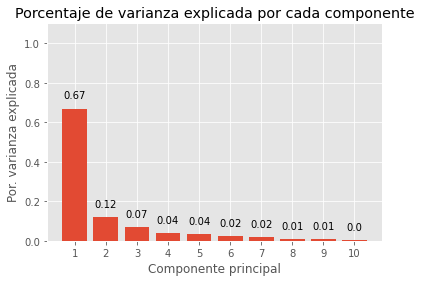

In [128]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_train_reduced.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

- En este caso, la primera componente explica el 88% de la varianza observada en los datos y la segunda el 12%. Las ocho componentes restantes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.66869199 0.78886263 0.86015152 0.90081202 0.93640056 0.96066372
 0.98022389 0.98903523 0.99666943 1.        ]


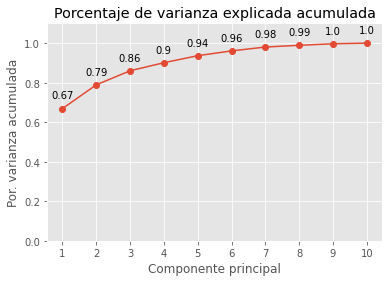

In [126]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X_train_reduced.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_train_reduced.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

- Con las primeras cinco componentes se consigue explicar el 94% de la varianza observada.